<a href="https://colab.research.google.com/github/HowardHNguyen/Marketing_Data_Science/blob/main/HomeOwner_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# percentage
def percentage(a,b):
  if b== 0:
    return None
  return ((a/b)*100)

In [ ]:
import pandas as pd

In [ ]:
# read data files and merge them together
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/data/7-29-2021-to-10-13-2021-Leads.csv')
df2 = pd.read_csv('/content/drive/MyDrive/data/10-22-2021-All-Leads-BK.csv')
#concat both df into a single df
data10222021 = pd.concat([df1,df2])
data10222021.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (30,31,35,44,55,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (28,29,42,53,54,56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,Internal_Score__c,SBLManager_Lookup__c,Name,AnnualRevenue,Borrower_Type__c,Business_History_Months__c,Business_Monthly_Revenue__c,Business_Name__c,Business_State__c,Campaign__c,CampaignId__c,ConvertedAccountId,ConvertedContactId,ConvertedOpportunityId,CreatedById,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,IndividualId,LastModifiedById,LastName,Id,Loan_Agent__c,Loan_Status__c,MasterRecordId,MiddleName,MobilePhone,Monthly_Income__c,OwnerId,PartnerAccountId,Phone,Pricing_Version__c,RecordTypeId,Requested_Loan_Amount__c,Selected_Product__c,SSN_Verification__c,State__c,Status,Preferred_Language__c,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Lead_Creator__c,Original_Loan_Agent__c,Loan_Amount__c,IsConverted,DoNotCall,Highest_Step__c,Loan_Partner__c,Mailer_Approved__c,Mailer_ID__c,Referral__c,Sanco_Lead_Id__c,Sanco_Status__c,State_Code
0,0.0,0.0,410.0,NaN,JEREMIAH LAMBERT,NaN,New,NaN,NaN,NaN,NaN,7011U000000hVf2QAE,3706.0,NaN,NaN,NaN,0051U000006PGsoQAG,5/24/2021 11:56:19 AM,8/29/1997 12:00:00 AM,False,maldonadoiris035@gmail.com,False,JEREMIAH,NaN,0051U000006PGsoQAG,LAMBERT,00Q1U00000TMMhKUAX,0051U000006PTLwQAO,Pending Denial,NaN,NaN,6063594267,0,0051U000006PTLwQAO,NaN,8592673208,a1k1U000002KiGUQA0,0121U000000jV0pQAE,2000.0,NaN,a1o1U000003HVB6QAO,KY,Rejected Lead,NaN,5182,Loanry - C,False,NaN,NaN,0,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,638.0,NaN,STEVE DEBOSE,NaN,New,NaN,NaN,NaN,NaN,7011U000000hSl2QAE,2716.0,NaN,NaN,NaN,0051U000006PGsoQAG,5/24/2021 11:34:01 AM,11/26/1976 12:00:00 AM,False,debose34@gmail.com,False,STEVE,NaN,0051U000006PGsoQAG,DEBOSE,00Q1U00000TMMhMUAX,0051U000006PTLwQAO,Pending Denial,NaN,NaN,4073145448,4000,0051U000006PTLwQAO,NaN,4073145448,a1k1U000002KiGUQA0,0121U000000jV0pQAE,2500.0,NaN,a1o1U000003ODjcQAG,FL,Rejected Lead,NaN,4947,Monevo - C,False,NaN,NaN,0,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


In [ ]:
# export to file - records upto 10-22 2021
data10222021.to_csv('/content/drive/MyDrive/data/RawData-10222021.csv', index=False)

In [ ]:
RawData_10222021 = pd.read_csv('/content/drive/MyDrive/data/RawData-10222021.csv')
RawData_10222021.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (30,31,35,44,55,56,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,Internal_Score__c,SBLManager_Lookup__c,Name,AnnualRevenue,Borrower_Type__c,Business_History_Months__c,Business_Monthly_Revenue__c,Business_Name__c,Business_State__c,Campaign__c,CampaignId__c,ConvertedAccountId,ConvertedContactId,ConvertedOpportunityId,CreatedById,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,IndividualId,LastModifiedById,LastName,Id,Loan_Agent__c,Loan_Status__c,MasterRecordId,MiddleName,MobilePhone,Monthly_Income__c,OwnerId,PartnerAccountId,Phone,Pricing_Version__c,RecordTypeId,Requested_Loan_Amount__c,Selected_Product__c,SSN_Verification__c,State__c,Status,Preferred_Language__c,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Lead_Creator__c,Original_Loan_Agent__c,Loan_Amount__c,IsConverted,DoNotCall,Highest_Step__c,Loan_Partner__c,Mailer_Approved__c,Mailer_ID__c,Referral__c,Sanco_Lead_Id__c,Sanco_Status__c,State_Code
0,0.0,0.0,410.0,NaN,JEREMIAH LAMBERT,NaN,New,NaN,NaN,NaN,NaN,7011U000000hVf2QAE,3706.0,NaN,NaN,NaN,0051U000006PGsoQAG,5/24/2021 11:56:19 AM,8/29/1997 12:00:00 AM,False,maldonadoiris035@gmail.com,False,JEREMIAH,NaN,0051U000006PGsoQAG,LAMBERT,00Q1U00000TMMhKUAX,0051U000006PTLwQAO,Pending Denial,NaN,NaN,6063594267,0,0051U000006PTLwQAO,NaN,8592673208,a1k1U000002KiGUQA0,0121U000000jV0pQAE,2000.0,NaN,a1o1U000003HVB6QAO,KY,Rejected Lead,NaN,5182,Loanry - C,False,NaN,NaN,0,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,638.0,NaN,STEVE DEBOSE,NaN,New,NaN,NaN,NaN,NaN,7011U000000hSl2QAE,2716.0,NaN,NaN,NaN,0051U000006PGsoQAG,5/24/2021 11:34:01 AM,11/26/1976 12:00:00 AM,False,debose34@gmail.com,False,STEVE,NaN,0051U000006PGsoQAG,DEBOSE,00Q1U00000TMMhMUAX,0051U000006PTLwQAO,Pending Denial,NaN,NaN,4073145448,4000,0051U000006PTLwQAO,NaN,4073145448,a1k1U000002KiGUQA0,0121U000000jV0pQAE,2500.0,NaN,a1o1U000003ODjcQAG,FL,Rejected Lead,NaN,4947,Monevo - C,False,NaN,NaN,0,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
2,2.0,2.0,NaN,NaN,MARSHA WILLIAMS,NaN,New,NaN,NaN,NaN,NaN,7011U000000hSsaQAE,3184.0,NaN,NaN,NaN,0051U000006PGsoQAG,5/24/2021 11:34:12 AM,8/4/1961 12:00:00 AM,False,mwilliams0804@gmail.com,False,MARSHA,NaN,0051U000006PGsoQAG,WILLIAMS,00Q1U00000TMMhRUAX,0051U000006PTLwQAO,Pending Approval,NaN,NaN,3027503090,10800,0051U000006PTLwQAO,NaN,3027503090,a1k1U000002KiGUQA0,0121U000000jV0pQAE,1000.0,NaN,a1o1U000003O01bQAC,DE,Rejected Lead,NaN,4685,QuinStreet - C,True,NaN,NaN,0,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
3,3.0,3.0,625.0,NaN,WILLIAM SCHOSSR,NaN,New,NaN,NaN,NaN,NaN,7011U000000hVf2QAE,3706.0,NaN,NaN,NaN,0051U000006PGsoQAG,5/24/2021 11:34:51 AM,11/11/1960 12:00:00 AM,False,butchwalkaboutschosser@gmail.com,False,WILLIAM,NaN,0051U000007j2oMQAQ,SCHOSSR,00Q1U00000TMMhSUAX,0051U000006PTLwQAO,Pending Denial,NaN,NaN,9282990559,0,0051U000006PTLwQAO,NaN,9282990559,a1k1U000002KiGUQA0,0121U000000jV0pQAE,2000.0,NaN,NaN,AZ,Rejected Lead,NaN,5182,Loanry - C,False,NaN,NaN,0,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
4,4.0,4.0,643.0,NaN,JOSEPH VALLE,NaN,New,NaN,NaN,NaN,NaN,7011U000000hSsaQAE,3184.0,NaN,NaN,NaN,0051U000006PGsoQAG,5/24/2021 11:34:15 AM,9/15/1997 12:00:00 AM,False,jvalle0915@icloud.com,False,JOSEPH,NaN,0051U000006PGsoQAG,VALLE,00Q1U00000TMMhWUAX,0051U000006PTLwQAO,Pending Denial,NaN,NaN,6155468908,3000,0051U000006PTLwQAO,NaN,6155468908,a1k1U000002KiGUQA0,0121U000000jV0pQAE,1000.0,NaN,a1o1U000003OAQDQA4,TN,Rejected Lead,NaN,4685,QuinStreet - C,False,NaN,NaN,0,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


In [ ]:
RawData_10222021.shape

(4344732, 60)

In [ ]:
# drop and remove duplicate - inplace =True
# data.drop_duplicates(inplace=True)
# drop duplicate based on Phone column
data_10222021 = RawData_10222021.drop_duplicates(subset='Phone', keep="first")

In [ ]:
data_10222021.shape

(1338400, 60)

In [ ]:
# drop and remove duplicate - inplace =True
# data.drop_duplicates(inplace=True)
# drop duplicate based on Phone column
data_Id10222021 = RawData_10222021.drop_duplicates(subset='Id', keep="first")

In [ ]:
data_Id10222021.shape

(3072737, 60)

In [ ]:
#Export file
data_Id10222021.to_csv('/content/drive/MyDrive/data/RawCleanData_10222021.csv', index=False)

In [ ]:
data_all = pd.read_csv('/content/drive/MyDrive/data/RawCleanData_10222021.csv')
data_all.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (30,31,35,44,55,56,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,Internal_Score__c,SBLManager_Lookup__c,Name,AnnualRevenue,Borrower_Type__c,Business_History_Months__c,Business_Monthly_Revenue__c,Business_Name__c,Business_State__c,Campaign__c,CampaignId__c,ConvertedAccountId,ConvertedContactId,ConvertedOpportunityId,CreatedById,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,IndividualId,LastModifiedById,LastName,Id,Loan_Agent__c,Loan_Status__c,MasterRecordId,MiddleName,MobilePhone,Monthly_Income__c,OwnerId,PartnerAccountId,Phone,Pricing_Version__c,RecordTypeId,Requested_Loan_Amount__c,Selected_Product__c,SSN_Verification__c,State__c,Status,Preferred_Language__c,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Lead_Creator__c,Original_Loan_Agent__c,Loan_Amount__c,IsConverted,DoNotCall,Highest_Step__c,Loan_Partner__c,Mailer_Approved__c,Mailer_ID__c,Referral__c,Sanco_Lead_Id__c,Sanco_Status__c,State_Code
0,0.0,0.0,410.0,NaN,JEREMIAH LAMBERT,NaN,New,NaN,NaN,NaN,NaN,7011U000000hVf2QAE,3706.0,NaN,NaN,NaN,0051U000006PGsoQAG,5/24/2021 11:56:19 AM,8/29/1997 12:00:00 AM,False,maldonadoiris035@gmail.com,False,JEREMIAH,NaN,0051U000006PGsoQAG,LAMBERT,00Q1U00000TMMhKUAX,0051U000006PTLwQAO,Pending Denial,NaN,NaN,6063594267,0,0051U000006PTLwQAO,NaN,8592673208,a1k1U000002KiGUQA0,0121U000000jV0pQAE,2000.0,NaN,a1o1U000003HVB6QAO,KY,Rejected Lead,NaN,5182,Loanry - C,False,NaN,NaN,0,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,638.0,NaN,STEVE DEBOSE,NaN,New,NaN,NaN,NaN,NaN,7011U000000hSl2QAE,2716.0,NaN,NaN,NaN,0051U000006PGsoQAG,5/24/2021 11:34:01 AM,11/26/1976 12:00:00 AM,False,debose34@gmail.com,False,STEVE,NaN,0051U000006PGsoQAG,DEBOSE,00Q1U00000TMMhMUAX,0051U000006PTLwQAO,Pending Denial,NaN,NaN,4073145448,4000,0051U000006PTLwQAO,NaN,4073145448,a1k1U000002KiGUQA0,0121U000000jV0pQAE,2500.0,NaN,a1o1U000003ODjcQAG,FL,Rejected Lead,NaN,4947,Monevo - C,False,NaN,NaN,0,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
2,2.0,2.0,NaN,NaN,MARSHA WILLIAMS,NaN,New,NaN,NaN,NaN,NaN,7011U000000hSsaQAE,3184.0,NaN,NaN,NaN,0051U000006PGsoQAG,5/24/2021 11:34:12 AM,8/4/1961 12:00:00 AM,False,mwilliams0804@gmail.com,False,MARSHA,NaN,0051U000006PGsoQAG,WILLIAMS,00Q1U00000TMMhRUAX,0051U000006PTLwQAO,Pending Approval,NaN,NaN,3027503090,10800,0051U000006PTLwQAO,NaN,3027503090,a1k1U000002KiGUQA0,0121U000000jV0pQAE,1000.0,NaN,a1o1U000003O01bQAC,DE,Rejected Lead,NaN,4685,QuinStreet - C,True,NaN,NaN,0,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


In [ ]:
# clean dataset for modeling
data_clean = data_all.drop(['Unnamed: 0','Unnamed: 0.1','Sanco_Status__c','Sanco_Lead_Id__c','Mailer_ID__c','Preferred_Language__c','SSN_Verification__c',
                            'Selected_Product__c','SBLManager_Lookup__c','Name',
                            'RecordTypeId','Pricing_Version__c','PartnerAccountId','OwnerId','MiddleName','Loan_Agent__c','MasterRecordId',
                            'IndividualId','CreatedById','ConvertedOpportunityId','ConvertedContactId','ConvertedAccountId','Borrower_Type__c'], axis=1)
data_clean.head(2)

,Internal_Score__c,AnnualRevenue,Business_History_Months__c,Business_Monthly_Revenue__c,Business_Name__c,Business_State__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastModifiedById,LastName,Id,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Lead_Creator__c,Original_Loan_Agent__c,Loan_Amount__c,IsConverted,DoNotCall,Highest_Step__c,Loan_Partner__c,Mailer_Approved__c,Referral__c,State_Code
0,410.0,NaN,NaN,NaN,NaN,NaN,7011U000000hVf2QAE,3706.0,5/24/2021 11:56:19 AM,8/29/1997 12:00:00 AM,False,maldonadoiris035@gmail.com,False,JEREMIAH,0051U000006PGsoQAG,LAMBERT,00Q1U00000TMMhKUAX,Pending Denial,6063594267,0,8592673208,2000.0,KY,Rejected Lead,5182,Loanry - C,False,NaN,NaN,0,False,False,NaN,NaN,False,NaN,NaN
1,638.0,NaN,NaN,NaN,NaN,NaN,7011U000000hSl2QAE,2716.0,5/24/2021 11:34:01 AM,11/26/1976 12:00:00 AM,False,debose34@gmail.com,False,STEVE,0051U000006PGsoQAG,DEBOSE,00Q1U00000TMMhMUAX,Pending Denial,4073145448,4000,4073145448,2500.0,FL,Rejected Lead,4947,Monevo - C,False,NaN,NaN,0,False,False,NaN,NaN,False,NaN,NaN


In [ ]:
data_clean.shape

(3072737, 37)

In [ ]:
Antoi = data_clean[data_clean.FirstName == 'Antoi']
Antoi.head(20)

,Internal_Score__c,AnnualRevenue,Business_History_Months__c,Business_Monthly_Revenue__c,Business_Name__c,Business_State__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastModifiedById,LastName,Id,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Lead_Creator__c,Original_Loan_Agent__c,Loan_Amount__c,IsConverted,DoNotCall,Highest_Step__c,Loan_Partner__c,Mailer_Approved__c,Referral__c,State_Code


In [ ]:
data_clean.groupby('Is_Homeowner__c')['Status'].count()

In [ ]:
percentage(443393,2629344)

16.86325562573783

In [ ]:
# Select only LoanMePrime list - PPC source
LoanMePrime_data = data_clean[data_clean.Affiliate_Name__c == 'LoanMePrime.com - C']
LoanMePrime_data.tail(2)

,Internal_Score__c,AnnualRevenue,Business_History_Months__c,Business_Monthly_Revenue__c,Business_Name__c,Business_State__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastModifiedById,LastName,Id,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Lead_Creator__c,Original_Loan_Agent__c,Loan_Amount__c,IsConverted,DoNotCall,Highest_Step__c,Loan_Partner__c,Mailer_Approved__c,Referral__c,State_Code
3072594,613.0,NaN,NaN,NaN,NaN,NaN,7011U000000hSjDQAU,2603.0,10/19/2021 2:28:21 PM,3/27/1955 12:00:00 AM,True,donnacupp265@gmail.com,False,DONNA,0051U000006PTLwQAO,CUPP,00Q4X00001raOwpUAE,Pending Denial,NaN,4700,9.18315e+09,NaN,OK,Failed Prequal,5042,LoanMePrime.com - C,False,NaN,NaN,0,False,False,NaN,NaN,False,NaN,NaN
3072601,661.0,NaN,NaN,NaN,NaN,NaN,7011U000000hSjDQAU,2603.0,10/19/2021 2:28:50 PM,3/8/1954 12:00:00 AM,False,bjfrog19@yahoo.com,False,BONNIE,0051U000006PTLwQAO,STEPHENS,00Q4X00001raOxsUAE,Pending Denial,NaN,1099,7.14659e+09,3100.0,CA,Failed Prequal,5042,LoanMePrime.com - C,False,NaN,NaN,0,False,False,NaN,NaN,False,NaN,NaN


In [ ]:
LoanMePrime_data.shape

(20089, 37)

In [ ]:
data_clean['Status'].isnull().sum()

0

In [ ]:
data_clean.isnull().sum()

Internal_Score__c              1450981
AnnualRevenue                  3072737
Business_History_Months__c     3064306
Business_Monthly_Revenue__c    3062941
Business_Name__c               3058317
Business_State__c              3057975
Campaign__c                          0
CampaignId__c                      191
CreatedDate                          0
Date_of_Birth_DOB__c             18604
Dis_Other_Messaging__c               0
Email                             1018
HasOptedOutOfEmail                   0
FirstName                           14
LastModifiedById                     0
LastName                            86
Id                                   0
Loan_Status__c                       0
MobilePhone                     791923
Monthly_Income__c                    0
Phone                            46669
Requested_Loan_Amount__c        250446
State__c                          1511
Status                               0
Affiliate_ID_Number__c               0
Affiliate_Name__c        

In [ ]:
data_clean['Status'].value_counts

<bound method IndexOpsMixin.value_counts of 0                  Rejected Lead
1                  Rejected Lead
2                  Rejected Lead
3                  Rejected Lead
4                  Rejected Lead
                   ...          
3072732            Rejected Lead
3072733                      New
3072734    Called - Left Message
3072735                      New
3072736            Rejected Lead
Name: Status, Length: 3072737, dtype: object>

In [ ]:
data_clean.groupby('Status')['Loan_Amount__c'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Appointment Set,1199.0,3298.509591,6086.109107,0.0,0.0,2100.0,4000.00,100000.0
Bad Contact Info,6794.0,2341.271122,2905.091471,0.0,0.0,1500.0,3000.00,70000.0
Broker Commission Set,13.0,31161.538462,35225.311412,0.0,0.0,3000.0,75000.00,75000.0
Call Transferred,1239.0,1914.850686,2751.564362,0.0,0.0,1100.0,2900.00,20000.0
Call successful,2444.0,2696.749182,3215.046607,0.0,1100.0,2200.0,3000.00,70000.0
Called - Left Message,159219.0,2796.002851,3039.579571,0.0,1100.0,2200.0,3300.00,150000.0
Called - No Contact,42150.0,2365.131127,2955.103416,0.0,0.0,1700.0,3000.00,100000.0
Converted,58349.0,5319.631236,12735.670159,0.0,1700.0,2800.0,3500.00,200000.0
Duplicate,11477.0,176.374488,1833.800109,0.0,0.0,0.0,0.00,100000.0


In [ ]:
data_clean.corr()

In [ ]:
data_clean.groupby('Affiliate_Name__c')['Loan_Amount__c'].describe()

In [ ]:
data_clean.groupby('Status')['Campaign__c'].count()

In [ ]:
# read data file
import pandas as pd
prequal_leads = pd.read_csv('/content/drive/MyDrive/data/10-6-2021-Prequal---Leads-Not-Yet-Converted.csv')
prequal_leads.head(2)

In [ ]:
prequal_leads.groupby('Affiliate_Name__c')['Status'].count()

In [ ]:
prequal_leads.shape

(1167, 11)

In [ ]:
data_clean.describe()

In [ ]:
data_clean['Is_Homeowner__c'].value_counts()

False    2629344
True      443393
Name: Is_Homeowner__c, dtype: int64

In [ ]:
data_clean.shape

(3072737, 37)

In [ ]:
2629344+443393

3072737

In [ ]:
data_clean['Affiliate_Name__c'].value_counts()

QuinStreet - C                            1178572
Loanry - C                                 726830
Lending Tree - C                           432451
Monevo - C                                 196102
LoanCall.com - C                           112520
                                           ...   
Best Company Reviews - B                        1
CF Capital Group                                1
Strategic Voyages Business Consultants          1
US Funding Service                              1
SCF Funding                                     1
Name: Affiliate_Name__c, Length: 560, dtype: int64

In [ ]:
data_clean.columns

Index(['Internal_Score__c', 'AnnualRevenue', 'Business_History_Months__c',
       'Business_Monthly_Revenue__c', 'Business_Name__c', 'Business_State__c',
       'Campaign__c', 'CampaignId__c', 'CreatedDate', 'Date_of_Birth_DOB__c',
       'Dis_Other_Messaging__c', 'Email', 'HasOptedOutOfEmail', 'FirstName',
       'LastModifiedById', 'LastName', 'Id', 'Loan_Status__c', 'MobilePhone',
       'Monthly_Income__c', 'Phone', 'Requested_Loan_Amount__c', 'State__c',
       'Status', 'Affiliate_ID_Number__c', 'Affiliate_Name__c',
       'Is_Homeowner__c', 'Lead_Creator__c', 'Original_Loan_Agent__c',
       'Loan_Amount__c', 'IsConverted', 'DoNotCall', 'Highest_Step__c',
       'Loan_Partner__c', 'Mailer_Approved__c', 'Referral__c', 'State_Code'],
      dtype='object')

In [ ]:
# small size file for SBL
data_homeowner = data_clean.drop(['AnnualRevenue', 'Business_History_Months__c','Dis_Other_Messaging__c','LastModifiedById','Lead_Creator__c',
       'Original_Loan_Agent__c','Business_Monthly_Revenue__c', 'Business_Name__c', 'Business_State__c','Highest_Step__c',
       'Loan_Partner__c', 'Mailer_Approved__c', 'Referral__c'], axis=1)
data_homeowner.head(2)

,Internal_Score__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Email,HasOptedOutOfEmail,FirstName,LastName,Id,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall,State_Code
0,410.0,7011U000000hVf2QAE,3706.0,5/24/2021 11:56:19 AM,8/29/1997 12:00:00 AM,maldonadoiris035@gmail.com,False,JEREMIAH,LAMBERT,00Q1U00000TMMhKUAX,Pending Denial,6063594267,0,8592673208,2000.0,KY,Rejected Lead,5182,Loanry - C,False,0,False,False,NaN
1,638.0,7011U000000hSl2QAE,2716.0,5/24/2021 11:34:01 AM,11/26/1976 12:00:00 AM,debose34@gmail.com,False,STEVE,DEBOSE,00Q1U00000TMMhMUAX,Pending Denial,4073145448,4000,4073145448,2500.0,FL,Rejected Lead,4947,Monevo - C,False,0,False,False,NaN


In [ ]:
true_false = {True: 1, False: 0}
data_homeowner['Homeowner'] = data_homeowner['Is_Homeowner__c'].map(true_false)
data_homeowner.head()

,Internal_Score__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Email,HasOptedOutOfEmail,FirstName,LastName,Id,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall,State_Code,Homeowner
0,410.0,7011U000000hVf2QAE,3706.0,5/24/2021 11:56:19 AM,8/29/1997 12:00:00 AM,maldonadoiris035@gmail.com,False,JEREMIAH,LAMBERT,00Q1U00000TMMhKUAX,Pending Denial,6063594267,0,8592673208,2000.0,KY,Rejected Lead,5182,Loanry - C,False,0,False,False,NaN,0
1,638.0,7011U000000hSl2QAE,2716.0,5/24/2021 11:34:01 AM,11/26/1976 12:00:00 AM,debose34@gmail.com,False,STEVE,DEBOSE,00Q1U00000TMMhMUAX,Pending Denial,4073145448,4000,4073145448,2500.0,FL,Rejected Lead,4947,Monevo - C,False,0,False,False,NaN,0
2,NaN,7011U000000hSsaQAE,3184.0,5/24/2021 11:34:12 AM,8/4/1961 12:00:00 AM,mwilliams0804@gmail.com,False,MARSHA,WILLIAMS,00Q1U00000TMMhRUAX,Pending Approval,3027503090,10800,3027503090,1000.0,DE,Rejected Lead,4685,QuinStreet - C,True,0,False,False,NaN,1
3,625.0,7011U000000hVf2QAE,3706.0,5/24/2021 11:34:51 AM,11/11/1960 12:00:00 AM,butchwalkaboutschosser@gmail.com,False,WILLIAM,SCHOSSR,00Q1U00000TMMhSUAX,Pending Denial,9282990559,0,9282990559,2000.0,AZ,Rejected Lead,5182,Loanry - C,False,0,False,False,NaN,0
4,643.0,7011U000000hSsaQAE,3184.0,5/24/2021 11:34:15 AM,9/15/1997 12:00:00 AM,jvalle0915@icloud.com,False,JOSEPH,VALLE,00Q1U00000TMMhWUAX,Pending Denial,6155468908,3000,6155468908,1000.0,TN,Rejected Lead,4685,QuinStreet - C,False,0,False,False,NaN,0


In [ ]:
#import numpy as np
#data_homeowner['Homeowner'] = np.where(data_homeowner['Homeowner'].isnull(),0,1)
#data_homeowner.head(30)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

%matplotlib inline
rcParams['figure.figsize']=5,4

import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

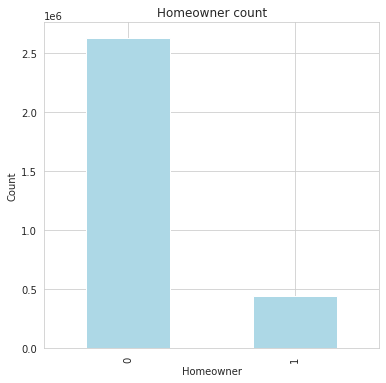

In [ ]:
ax1 = data_homeowner.groupby('Homeowner').count()['Status'].plot(kind = 'bar', color='lightblue', grid=True, figsize=(6,6), title='Homeowner count')
ax1.set_xlabel('Homeowner')
ax1.set_ylabel('Count')
plt.show()

In [ ]:
data_clean['CreatedDate'] = pd.to_datetime(data_clean['CreatedDate'])

In [ ]:
# First day of CreatedDate in df
data_clean['CreatedDate'].min()

Timestamp('2021-02-24 09:44:31')

In [ ]:
# Last day of CreatedDate in df
data_clean['CreatedDate'].max()

Timestamp('2021-10-22 10:05:57')

In [ ]:
# list of records upto 10/2021
df_all_2242021_1012021 = data_clean.loc[(data_clean['CreatedDate'] >= '2/24/2021') & (data_clean['CreatedDate'] <= '10/22/2021')]
df_all_2242021_1012021.tail(2)

,Internal_Score__c,AnnualRevenue,Business_History_Months__c,Business_Monthly_Revenue__c,Business_Name__c,Business_State__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Dis_Other_Messaging__c,Email,HasOptedOutOfEmail,FirstName,LastModifiedById,LastName,Id,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Lead_Creator__c,Original_Loan_Agent__c,Loan_Amount__c,IsConverted,DoNotCall,Highest_Step__c,Loan_Partner__c,Mailer_Approved__c,Referral__c,State_Code,Homeowner
3072735,720.0,NaN,NaN,NaN,NaN,NaN,7011U000000hSsaQAE,3184.0,2021-10-21 18:43:08,5/1/1966 12:00:00 AM,False,vgnade@yahoo.com,False,VERONICA,0051U000006PGsoQAG,GNADE,00Q4X00001ray4uUAA,Pending Approval,6.01215e+09,5001,6.01215e+09,1000.0,MS,New,4685,QuinStreet - C,True,NaN,NaN,1100,False,False,NaN,CC Bank,False,NaN,NaN,1
3072736,650.0,NaN,NaN,NaN,NaN,NaN,7011U000000hSb0QAE,2094.0,2021-10-21 18:56:52,4/28/1988 12:00:00 AM,False,elisena62@gmail.com,False,ELISENA,0051U000006PTLwQAO,CERNE,00Q4X00001rayCpUAI,Pending Denial,NaN,5000,5.61425e+09,1000.0,FL,Rejected Lead,4014,Lending Tree - C,False,NaN,NaN,0,False,False,NaN,NaN,False,NaN,NaN,0


In [ ]:
df_all_2242021_1012021.shape

(3066133, 38)

In [ ]:
# Select only Home owner list
df_homeowner_list = data_homeowner[data_homeowner.Is_Homeowner__c == True]
df_homeowner_list.tail(2)

,Internal_Score__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Email,HasOptedOutOfEmail,FirstName,LastName,Id,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall,State_Code,Homeowner
3072720,NaN,7011U000000hSsZQAU,3183.0,10/21/2021 6:56:18 PM,5/7/1992 12:00:00 AM,mrbrownboy1992@gmail.com,False,BRANDON,BROWN,00Q4X00001ray1sUAA,Pending Approval,9.56821e+09,4000,9.56821e+09,1000.0,TX,Rejected Lead,4685,QuinStreet - C,True,0,False,False,NaN,1
3072735,720.0,7011U000000hSsaQAE,3184.0,10/21/2021 6:43:08 PM,5/1/1966 12:00:00 AM,vgnade@yahoo.com,False,VERONICA,GNADE,00Q4X00001ray4uUAA,Pending Approval,6.01215e+09,5001,6.01215e+09,1000.0,MS,New,4685,QuinStreet - C,True,1100,False,False,NaN,1


In [ ]:
df_homeowner_list.shape

(443393, 25)

In [ ]:
# HOMEOWNER IN CA
df_homeowner_list_ca = df_homeowner_list[df_homeowner_list.State__c == 'CA']
df_homeowner_list_ca.head(2)

,Internal_Score__c,Campaign__c,CampaignId__c,CreatedDate,Date_of_Birth_DOB__c,Email,HasOptedOutOfEmail,FirstName,LastName,Id,Loan_Status__c,MobilePhone,Monthly_Income__c,Phone,Requested_Loan_Amount__c,State__c,Status,Affiliate_ID_Number__c,Affiliate_Name__c,Is_Homeowner__c,Loan_Amount__c,IsConverted,DoNotCall,State_Code,Homeowner
229,780.0,7011U000000hSsaQAE,3184.0,5/24/2021 12:47:10 PM,1/28/1973 12:00:00 AM,rebecca_castelo@yahoo.com,False,REBECCA,CASTELO,00Q1U00000TMOaEUAX,Pending Denial,4086440828,2667,4086440828,7000.0,CA,Rejected Lead,4685,QuinStreet - C,True,0,False,False,NaN,1
1225,853.0,7011U000000hSb0QAE,2094.0,5/27/2021 10:18:54 AM,3/20/1985 12:00:00 AM,tinango85@yahoo.com,False,TINA,NGO,00Q1U00000TNFKAUA5,Denied,NaN,3750,5626078391,9500.0,CA,Called - Left Message,4014,Lending Tree - C,True,8287,False,False,NaN,1


In [ ]:
df_homeowner_list_ca.shape

(10466, 25)

In [ ]:
df_homeowner_list_ca_optin = df_homeowner_list_ca[df_homeowner_list_ca.HasOptedOutOfEmail == False]

In [ ]:
df_homeowner_list_ca_optin.shape

(10461, 25)

In [ ]:
df_homeowner_list_ca_optin.to_csv('/content/drive/MyDrive/data/2-24-2021-to-8-31-2021-HomeownerOptin.csv')

In [ ]:
# HOMEOWNER IN FLORIDA
df_homeowner_list_fl = df_homeowner_list[df_homeowner_list.State__c == 'FL']
df_homeowner_list_fl.head(2)

,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,Loan_Status__c,MobilePhone,Phone,State__c,Status,Affiliate_Name__c,Is_Homeowner__c,IsConverted,Homeowner
15,5/24/2021 11:34:29 AM,ramdaschandra@hotmail.com,False,RAMDAS,CHANDRA,Denied,NaN,9544480552,FL,Called - Left Message,Lending Tree - C,True,False,1
58,5/24/2021 12:42:30 PM,sekhmetemi@gmail.com,False,ELLEN,ISABEL,Denied,5612362502,5612362502,FL,Called - Left Message,Loanry - C,True,False,1


In [ ]:
df_homeowner_list_fl_optin = df_homeowner_list_fl[df_homeowner_list_fl.HasOptedOutOfEmail == False]

In [ ]:
df_homeowner_list_fl_optin.shape

(43008, 14)

In [ ]:
# drop and remove duplicate - inplace =True
# data.drop_duplicates(inplace=True)
import numpy as np
# drop duplicate based on Email column
df_homeowner_list_fl_optin_nodup = df_homeowner_list_fl_optin.drop_duplicates(subset='Email', keep="first")

In [ ]:
df_homeowner_list_fl_optin_nodup.shape

(25832, 14)

In [ ]:
df_homeowner_list_fl_optin_nodup.to_csv('/content/drive/MyDrive/data/2-24-2021-to-8-31-2021-FL-HomeownerOptin.csv', index=False)

In [ ]:
# drop duplicate based on Phone column
df_homeowner_list_fl_optin_Phonenodup = df_homeowner_list_fl_optin.drop_duplicates(subset='Phone', keep="first")

In [ ]:
df_homeowner_list_fl_optin_Phonenodup.shape

(24663, 14)

In [ ]:
# Select only Lending Tree list
df_one_LT = data_homeowner[data_homeowner.Affiliate_Name__c == 'Lending Tree - C']
df_one_LT.head(2)

,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,Loan_Status__c,MobilePhone,Phone,State__c,Status,Affiliate_Name__c,Is_Homeowner__c,IsConverted
15,5/24/2021 11:34:29 AM,ramdaschandra@hotmail.com,False,RAMDAS,CHANDRA,Denied,NaN,9544480552,FL,Called - Left Message,Lending Tree - C,True,False
31,5/24/2021 12:41:47 PM,dozzerpopovici48@gmail.com,False,ALIN,POPOVICI,Denied,NaN,8133123640,FL,Rejected Lead,Lending Tree - C,False,False


In [ ]:
df_one_LT.shape

(283221, 13)

In [ ]:
# LT list of 8/8/2021
df_one_LT_882021 = df_one_LT.loc[(df_one_LT['CreatedDate'] >= '8/8/2021') & (df_one_LT['CreatedDate'] < '8/9/2021')]
df_one_LT_882021.tail(2)

,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,Loan_Status__c,MobilePhone,Phone,State__c,Status,Affiliate_Name__c,Is_Homeowner__c,IsConverted
1943185,8/8/2021 8:40:13 PM,rrcrosby@hotmail.com,False,RACHAEL,CROSBY,Pending Denial,NaN,7728281028,FL,Rejected Lead,Lending Tree - C,True,False
1943186,8/8/2021 8:40:22 PM,adgeisdope@icloud.com,False,ADRIAN,PERRY,Pending Denial,NaN,2094208805,CA,Rejected Lead,Lending Tree - C,False,False


In [ ]:
df_one_LT_882021.shape

(2053, 13)

In [ ]:
data_homeowner['Is_Homeowner__c'].value_counts()

False    2629344
True      443393
Name: Is_Homeowner__c, dtype: int64

In [ ]:
percentage(443393,2629344)

16.86325562573783

In [ ]:
# Select only Home owner list
df_homeowner_list = data_homeowner[data_homeowner.Is_Homeowner__c == True]
df_homeowner_list.tail(2)

,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,Loan_Status__c,MobilePhone,Phone,State__c,Status,Affiliate_Name__c,Is_Homeowner__c,IsConverted
1946310,8/18/2021 8:22:11 AM,erica.mcbride513@gmail.com,False,ERICA,MCBRIDE,Pending Approval,5139039951,5139039951,OH,Rejected Lead,QuinStreet - C,True,False
1946313,8/18/2021 8:22:13 AM,gabriel_hodson@yahoo.com,False,GABRIEL,HODSON,Pending Approval,8437519200,8437519200,SC,Rejected Lead,Monevo - C,True,False


In [ ]:
df_homeowner_list.info

In [ ]:
df_homeowner_list.shape

(222172, 13)

In [ ]:
# homeowner list of 8/8/2021
df_homeowner_list_882021 = df_homeowner_list.loc[(df_homeowner_list['CreatedDate'] >= '8/8/2021') & (df_homeowner_list['CreatedDate'] < '8/9/2021')]
df_homeowner_list_882021.tail(2)

,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,Loan_Status__c,MobilePhone,Phone,State__c,Status,Affiliate_Name__c,Is_Homeowner__c,IsConverted
1943172,8/8/2021 8:36:44 PM,nicholasharrist@hotmail.com,False,ELAINA,WASSOM,Pending Approval,NaN,7659671623,OH,Called - Left Message,Lending Tree - C,True,False
1943185,8/8/2021 8:40:13 PM,rrcrosby@hotmail.com,False,RACHAEL,CROSBY,Pending Denial,NaN,7728281028,FL,Rejected Lead,Lending Tree - C,True,False


In [ ]:
df_homeowner_list_882021.shape

(403, 13)

In [ ]:
df_homeowner_list_LT = df_homeowner_list[df_homeowner_list.Affiliate_Name__c == 'Lending Tree - C']
df_homeowner_list_LT.head(2)

,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,Loan_Status__c,MobilePhone,Phone,State__c,Status,Affiliate_Name__c,Is_Homeowner__c,IsConverted
15,5/24/2021 11:34:29 AM,ramdaschandra@hotmail.com,False,RAMDAS,CHANDRA,Denied,NaN,9544480552,FL,Called - Left Message,Lending Tree - C,True,False
154,5/24/2021 12:44:43 PM,riopedre.javier@gmail.com,False,JAVIER,RIOPEDRE,Denied,NaN,8502576860,FL,Rejected Lead,Lending Tree - C,True,False


In [ ]:
df_homeowner_list_LT.shape

(29422, 13)

In [ ]:
df_homeowner_list_LT_CA = df_homeowner_list_LT[df_homeowner_list_LT.State__c == 'CA']
df_homeowner_list_LT_CA.head(2)

,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,Loan_Status__c,MobilePhone,Phone,State__c,Status,Affiliate_Name__c,Is_Homeowner__c,IsConverted
1225,5/27/2021 10:18:54 AM,tinango85@yahoo.com,False,TINA,NGO,Denied,NaN,5626078391,CA,Called - Left Message,Lending Tree - C,True,False
2069,6/16/2021 12:53:28 PM,josefleytas10@gmail.com,False,JOSE,FLEYTAS,Denied,NaN,3105084705,CA,Called - Left Message,Lending Tree - C,True,False


In [ ]:
df_homeowner_list_LT_CA.shape

(2637, 13)

In [ ]:
# Ways to filter multiple columns in dataset
# tom_and_42 = df[(df["Name"]=="Tom") & (df["Age"]==42)]
# tom_or_34 = df[(df["Name"]=="Tom") | (df["Age"]==34)]
# tom42_or_34 = df[((df["Name"]=="Tom") & (df["Age"]<=42)) | (df["Age"]<=34)]

In [ ]:
# list of homeowners in CA from Lending Tree
df_homeowner_list_LT_CA = df_homeowner_list[(df_homeowner_list['State__c'] == 'CA') & (df_homeowner_list['Affiliate_Name__c'] == 'Lending Tree - C')]
df_homeowner_list_LT_CA.head(2)

,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,Loan_Status__c,MobilePhone,Phone,State__c,Status,Affiliate_Name__c,Is_Homeowner__c,IsConverted
1225,5/27/2021 10:18:54 AM,tinango85@yahoo.com,False,TINA,NGO,Denied,NaN,5626078391,CA,Called - Left Message,Lending Tree - C,True,False
2069,6/16/2021 12:53:28 PM,josefleytas10@gmail.com,False,JOSE,FLEYTAS,Denied,NaN,3105084705,CA,Called - Left Message,Lending Tree - C,True,False


In [ ]:
df_homeowner_list_LT_CA.shape

(2637, 13)

In [ ]:
# list of homeowners in DE from Lending Tree
df_homeowner_list_LT_DE = df_homeowner_list[(df_homeowner_list['State__c'] == 'DE') & (df_homeowner_list['Affiliate_Name__c'] == 'Lending Tree - C')]
df_homeowner_list_LT_DE.head(2)

,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,Loan_Status__c,MobilePhone,Phone,State__c,Status,Affiliate_Name__c,Is_Homeowner__c,IsConverted
1943,6/11/2021 7:17:16 AM,a_merg@yahoo.com,False,ANGELA,MERGENTHALER,Denied,NaN,3025590659,DE,Called - Left Message,Lending Tree - C,True,False
7490,4/22/2021 1:51:44 PM,eric.hicks@foxroach.com,False,ERIC,HICKS,Denied,NaN,3023575041,DE,Rejected Lead,Lending Tree - C,True,False


In [ ]:
df_homeowner_list_LT_DE.shape

(392, 13)

In [ ]:
# list of homeowners in TN from Lending Tree
df_homeowner_list_LT_TN = df_homeowner_list[(df_homeowner_list['State__c'] == 'TN') & (df_homeowner_list['Affiliate_Name__c'] == 'Lending Tree - C')]
df_homeowner_list_LT_TN.head(2)

,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,Loan_Status__c,MobilePhone,Phone,State__c,Status,Affiliate_Name__c,Is_Homeowner__c,IsConverted
4506,6/9/2021 7:26:09 PM,stephaniedosramos2@gmail.com,False,STEPHANIE,DOS RAMOS,Denied,NaN,6157792490,TN,Called - Left Message,Lending Tree - C,True,False
4809,6/13/2021 3:44:33 PM,ssddiego51@gmail.com,False,JUAN,DIEGO,Denied,NaN,9314728311,TN,Called - Left Message,Lending Tree - C,True,False


In [ ]:
df_homeowner_list_LT_TN.shape

(1129, 13)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#matplotlib.pyplot.scatter

In [ ]:
df_homeowner_list.head(3)

,CreatedDate,Email,HasOptedOutOfEmail,FirstName,LastName,Loan_Status__c,MobilePhone,Phone,State__c,Status,Affiliate_Name__c,Is_Homeowner__c,IsConverted
2,5/24/2021 11:34:12 AM,mwilliams0804@gmail.com,False,MARSHA,WILLIAMS,Pending Approval,3027503090,3027503090,DE,Rejected Lead,QuinStreet - C,True,False
15,5/24/2021 11:34:29 AM,ramdaschandra@hotmail.com,False,RAMDAS,CHANDRA,Denied,NaN,9544480552,FL,Called - Left Message,Lending Tree - C,True,False
27,5/24/2021 12:55:11 PM,rreberwein@aol.com,False,RUSSELL,EBERWEIN,Pending Approval,6145306915,6145306915,OH,Rejected Lead,QuinStreet - C,True,False
